# 📊 Основные метрики для каждого файла
| Метрика | Описание | Единицы измерения | Оптимальный диапазон |
|---------|----------|------------------|----------------------|
| filename | Имя файла | строка | - |
| duration | Длительность аудио | секунды | зависит от задачи |
| sample_rate | Частота дискретизации | Гц | 8кГц, 16кГц |
| rms | Среднеквадратичная амплитуда | нормализованные единицы | 0.01-0.3 |
| peak | Пиковая амплитуда | нормализованные единицы | < 1.0 |
| crest_factor | Крест-фактор (пик/RMS) | безразмерный | 3-15 (речь), 10-20 (музыка) |
| clipping_percent | Процент клиппинга | % | < 0.1% |
| spectral_centroid | Спектральный центроид | Гц | 1000-3000 (речь) |
| spectral_bandwidth | Полоса пропускания | Гц | шире = богаче спектр |
| snr_db | Соотношение сигнал/шум | дБ | > 20 дБ (хорошо), > 40 дБ (отлично) |

In [1]:
# @title 1. Установка зависимостей
# Установка библиотек
!pip install librosa matplotlib seaborn noisereduce -q
!apt-get install -y ffmpeg &> /dev/null


# Импорт библиотек
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

# Настройка для отображения в Colab
%matplotlib inline

In [2]:
# @title 2. Загрузка файлов

# # Способ 1: Загрузка через Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Способ 2: Загрузка файлов напрямую в Colab
from google.colab import files

print("Выберите один или несколько файлов для загрузки:")
uploaded = files.upload()

audio_files = list(uploaded.keys())
if not audio_files:
    print("Файлы не загружены. Использую тестовый файл...")
    !wget -q https://github.com/librosa/librosa/raw/main/tests/data/test1_22050.wav
    audio_files = ['test1_22050.wav']

print(f"\n✅ Загружено файлов: {len(audio_files)}")
for i, file in enumerate(audio_files, 1):
    print(f"  {i}. {file}")


Выберите один или несколько файлов для загрузки:


Saving audiotts_ru_free_hf_vits_low_multispeaker_8_12_989_S.wav to audiotts_ru_free_hf_vits_low_multispeaker_8_12_989_S.wav
Saving audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav to audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav
Saving audio_3_7_19992_B.wav to audio_3_7_19992_B.wav
Saving audio_3_7_19996_B.wav to audio_3_7_19996_B.wav

✅ Загружено файлов: 4
  1. audiotts_ru_free_hf_vits_low_multispeaker_8_12_989_S.wav
  2. audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav
  3. audio_3_7_19992_B.wav
  4. audio_3_7_19996_B.wav


In [ ]:
# @title Просмотреть список файлов
print(f"\nСписок загруженных файлов:")
for i, file in enumerate(audio_files, 1):
    print(f"  {i}. {file}")


Список загруженных файлов:
  1. audiotts_ru_free_hf_vits_low_multispeaker_8_12_989_S (1).wav
  2. audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S (2).wav
  3. audio_3_7_19992_B.wav
  4. audio_3_7_19996_B.wav



📊 АНАЛИЗ ФАЙЛА: audio_3_7_19992_B.wav
----------------------------------------
🔹 Длительность: 2.94 сек
🔹 Частота дискретизации: 16000 Гц
🔹 Количество сэмплов: 47,040
✅ Клиппинг: нет перегрузки


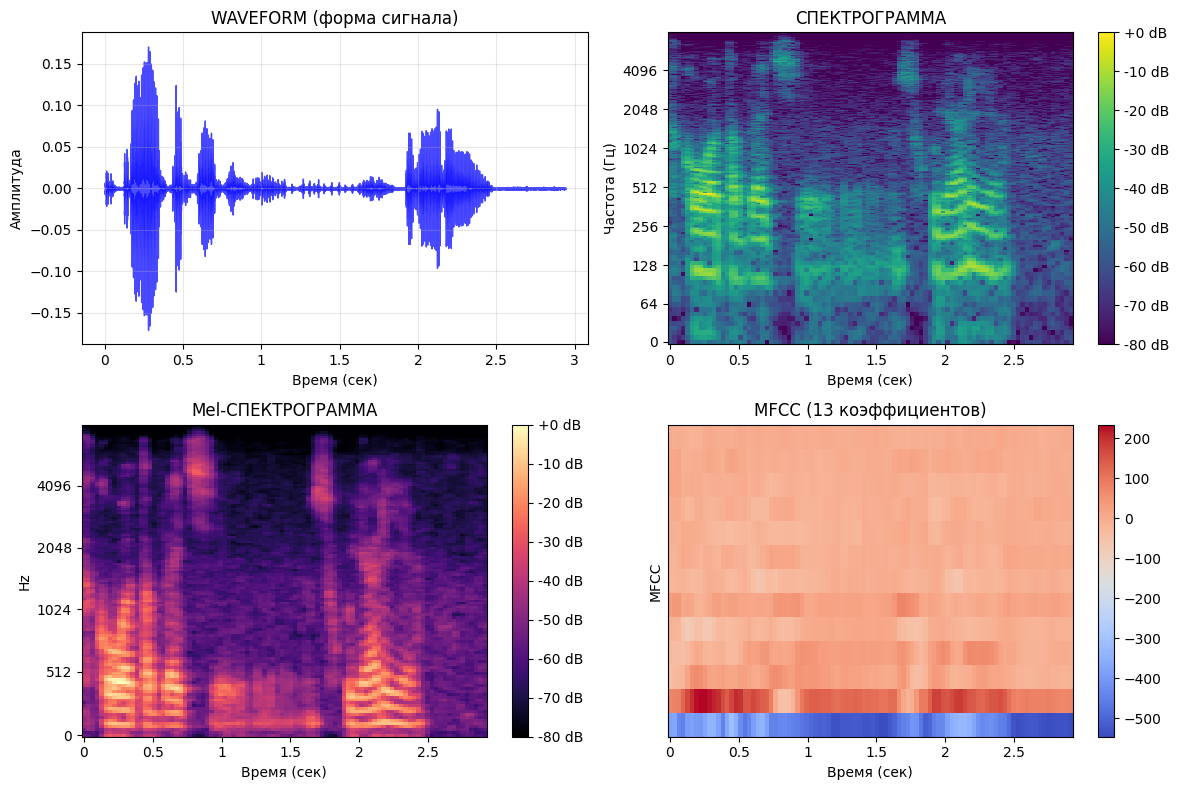


📏 АМПЛИТУДНЫЕ МЕТРИКИ:
  • RMS (среднеквадратичное): 0.0163
  • Пиковое значение: 0.1706
  • Крест-фактор: 10.48

📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
  • Спектральный центроид: 1453 Гц
  • Полоса пропускания: 1373 Гц

🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):
  • SNR: 15.6 dB
  • Качество: ⚠️  УДОВЛЕТВОРИТЕЛЬНОЕ

🎚️  MFCC (первые 5 коэффициентов):
  • MFCC_1: -455.99
  • MFCC_2: 116.95
  • MFCC_3: 12.56
  • MFCC_4: 15.22
  • MFCC_5: -15.73


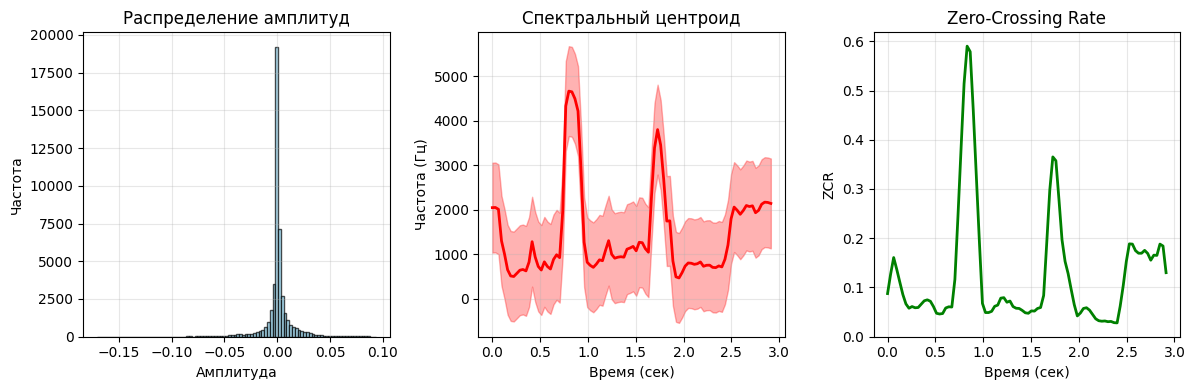

In [4]:
# @title 3.1 Обработка одного файла
# @markdown ## Для выбора файла
# @markdown Введите **номер файла** из списка выше.
findx = 3 # @param {"type":"number","placeholder":"Номер файла (1)"}


def simple_audio_analysis(audio_path, output=True):
    """Простой анализ одного аудиофайла"""
    try:
        # Загрузка файла
        y, sr = librosa.load(audio_path, sr=None)
        duration = len(y) / sr

        print(f"\n📊 АНАЛИЗ ФАЙЛА: {os.path.basename(audio_path)}")
        print("-" * 40)
        print(f"🔹 Длительность: {duration:.2f} сек")
        print(f"🔹 Частота дискретизации: {sr} Гц")
        print(f"🔹 Количество сэмплов: {len(y):,}")

        # 1. Waveform график
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        librosa.display.waveshow(y, sr=sr, color='blue', alpha=0.7)
        plt.title('WAVEFORM (форма сигнала)')
        plt.xlabel('Время (сек)')
        plt.ylabel('Амплитуда')
        plt.grid(True, alpha=0.3)

        # Проверка на клиппинг
        max_amp = np.max(np.abs(y))
        clipped = np.sum(np.abs(y) > 0.99)
        clip_percent = (clipped / len(y)) * 100

        if clip_percent > 0:
            print(f"⚠️  КЛИППИНГ: {clip_percent:.2f}% сигнала перегружено!")
        else:
            print(f"✅ Клиппинг: нет перегрузки")

        # 2. Спектрограмма
        plt.subplot(2, 2, 2)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr, cmap='viridis')
        plt.title('СПЕКТРОГРАММА')
        plt.xlabel('Время (сек)')
        plt.ylabel('Частота (Гц)')
        plt.colorbar(format='%+2.0f dB')

        # 3. Mel-спектрограмма
        plt.subplot(2, 2, 3)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        librosa.display.specshow(mel_spec_db, y_axis='mel', x_axis='time', sr=sr, cmap='magma')
        plt.title('Mel-СПЕКТРОГРАММА')
        plt.xlabel('Время (сек)')
        plt.colorbar(format='%+2.0f dB')

        # 4. MFCC
        plt.subplot(2, 2, 4)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
        plt.title('MFCC (13 коэффициентов)')
        plt.xlabel('Время (сек)')
        plt.ylabel('MFCC')
        plt.colorbar()

        plt.tight_layout()
        plt.show()

        # РАСЧЕТ МЕТРИК
        # ============================================

        # Амплитудные метрики
        rms = np.sqrt(np.mean(y**2))
        peak = np.max(np.abs(y))
        crest_factor = peak / (rms + 1e-10)

        print(f"\n📏 АМПЛИТУДНЫЕ МЕТРИКИ:")
        print(f"  • RMS (среднеквадратичное): {rms:.4f}")
        print(f"  • Пиковое значение: {peak:.4f}")
        print(f"  • Крест-фактор: {crest_factor:.2f}")

        # Спектральные метрики
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

        print(f"\n📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:")
        print(f"  • Спектральный центроид: {np.mean(spectral_centroid):.0f} Гц")
        print(f"  • Полоса пропускания: {np.mean(spectral_bandwidth):.0f} Гц")

        # Оценка SNR (простая)
        # Берем начало и конец как шум
        noise_samples = min(int(sr * 0.1), len(y) // 10)
        if noise_samples > 0:
            noise_segment = np.concatenate([y[:noise_samples], y[-noise_samples:]])
            signal_power = np.mean(y**2)
            noise_power = np.mean(noise_segment**2)

            if noise_power > 0:
                snr_db = 10 * np.log10(signal_power / noise_power)
                print(f"\n🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):")
                print(f"  • SNR: {snr_db:.1f} dB")

                if snr_db > 40:
                    print(f"  • Качество: ✅ ОТЛИЧНОЕ")
                elif snr_db > 20:
                    print(f"  • Качество: 👍 ХОРОШЕЕ")
                elif snr_db > 10:
                    print(f"  • Качество: ⚠️  УДОВЛЕТВОРИТЕЛЬНОЕ")
                else:
                    print(f"  • Качество: ❗ ПЛОХОЕ (много шума)")

        # MFCC средние значения
        print(f"\n🎚️  MFCC (первые 5 коэффициентов):")
        for i in range(min(5, mfccs.shape[0])):
            print(f"  • MFCC_{i+1}: {np.mean(mfccs[i]):.2f}")

        # ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ
        # ============================================

        # График распределения амплитуд
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.hist(y, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Распределение амплитуд')
        plt.xlabel('Амплитуда')
        plt.ylabel('Частота')
        plt.grid(True, alpha=0.3)

        # Спектральный центроид во времени
        plt.subplot(1, 3, 2)
        times = librosa.times_like(spectral_centroid, sr=sr)
        plt.plot(times, spectral_centroid, color='red', linewidth=2)
        plt.fill_between(times, spectral_centroid - np.std(spectral_centroid),
                        spectral_centroid + np.std(spectral_centroid), alpha=0.3, color='red')
        plt.title('Спектральный центроид')
        plt.xlabel('Время (сек)')
        plt.ylabel('Частота (Гц)')
        plt.grid(True, alpha=0.3)

        # Zero-crossing rate
        zero_crossing = librosa.feature.zero_crossing_rate(y)[0]
        plt.subplot(1, 3, 3)
        plt.plot(times[:len(zero_crossing)], zero_crossing, color='green', linewidth=2)
        plt.title('Zero-Crossing Rate')
        plt.xlabel('Время (сек)')
        plt.ylabel('ZCR')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Возвращаем метрики
        metrics = {
            'filename': os.path.basename(audio_path),
            'duration': duration,
            'sample_rate': sr,
            'rms': rms,
            'peak': peak,
            'crest_factor': crest_factor,
            'clipping_percent': clip_percent,
            'spectral_centroid': np.mean(spectral_centroid),
            'spectral_bandwidth': np.mean(spectral_bandwidth),
            'snr_db': snr_db if 'snr_db' in locals() else None
        }

        return metrics

    except Exception as e:
        print(f"❌ Ошибка при анализе файла: {e}")
        return None

if audio_files:
    simple_audio_analysis(audio_files[findx-1])



НАЧИНАЕМ АНАЛИЗ ВСЕХ ФАЙЛОВ

🔍 Анализ файла 1/4...

📊 АНАЛИЗ ФАЙЛА: audiotts_ru_free_hf_vits_low_multispeaker_8_12_989_S.wav
----------------------------------------
🔹 Длительность: 4.66 сек
🔹 Частота дискретизации: 16000 Гц
🔹 Количество сэмплов: 74,496
✅ Клиппинг: нет перегрузки


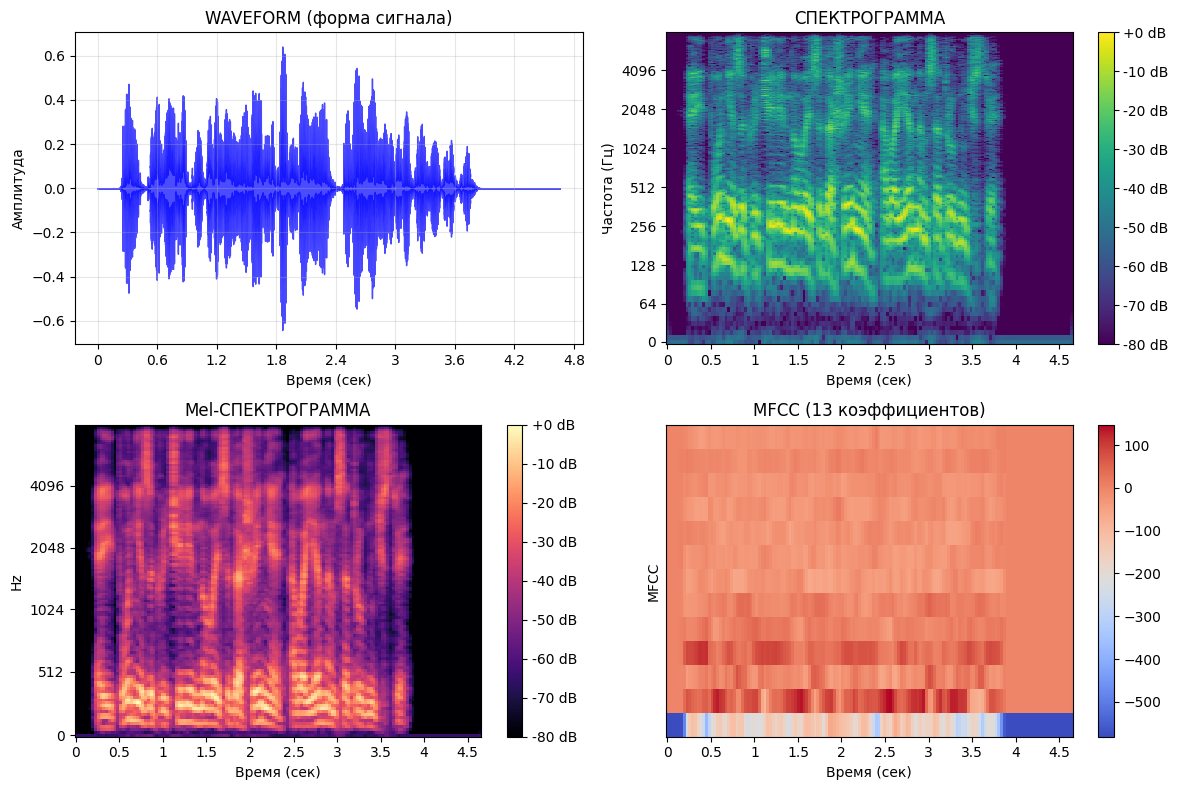


📏 АМПЛИТУДНЫЕ МЕТРИКИ:
  • RMS (среднеквадратичное): 0.0923
  • Пиковое значение: 0.6419
  • Крест-фактор: 6.95

📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
  • Спектральный центроид: 1799 Гц
  • Полоса пропускания: 1686 Гц

🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):
  • SNR: 51.6 dB
  • Качество: ✅ ОТЛИЧНОЕ

🎚️  MFCC (первые 5 коэффициентов):
  • MFCC_1: -264.62
  • MFCC_2: 45.83
  • MFCC_3: -1.08
  • MFCC_4: 40.12
  • MFCC_5: 5.31


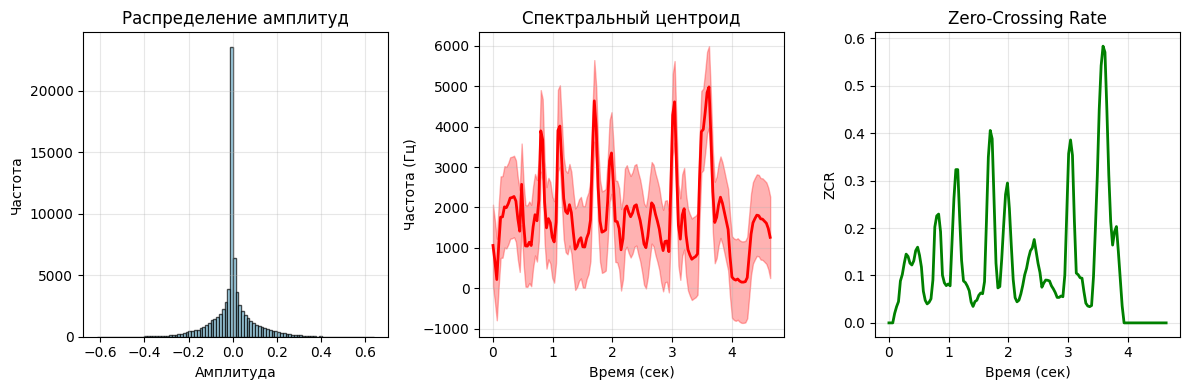


🔍 Анализ файла 2/4...

📊 АНАЛИЗ ФАЙЛА: audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav
----------------------------------------
🔹 Длительность: 5.28 сек
🔹 Частота дискретизации: 16000 Гц
🔹 Количество сэмплов: 84,480
✅ Клиппинг: нет перегрузки


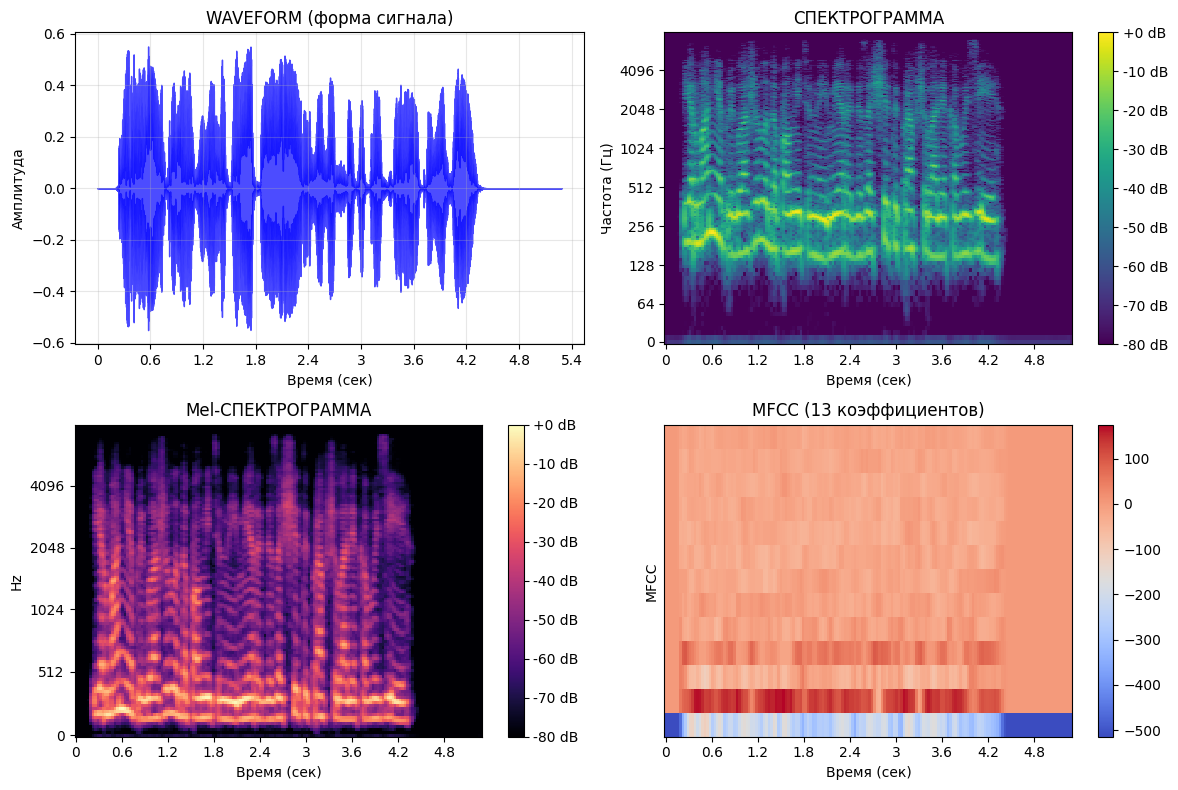


📏 АМПЛИТУДНЫЕ МЕТРИКИ:
  • RMS (среднеквадратичное): 0.1448
  • Пиковое значение: 0.5503
  • Крест-фактор: 3.80

📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
  • Спектральный центроид: 1192 Гц
  • Полоса пропускания: 1311 Гц

🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):
  • SNR: 64.0 dB
  • Качество: ✅ ОТЛИЧНОЕ

🎚️  MFCC (первые 5 коэффициентов):
  • MFCC_1: -291.87
  • MFCC_2: 91.76
  • MFCC_3: -24.82
  • MFCC_4: 30.73
  • MFCC_5: -9.05


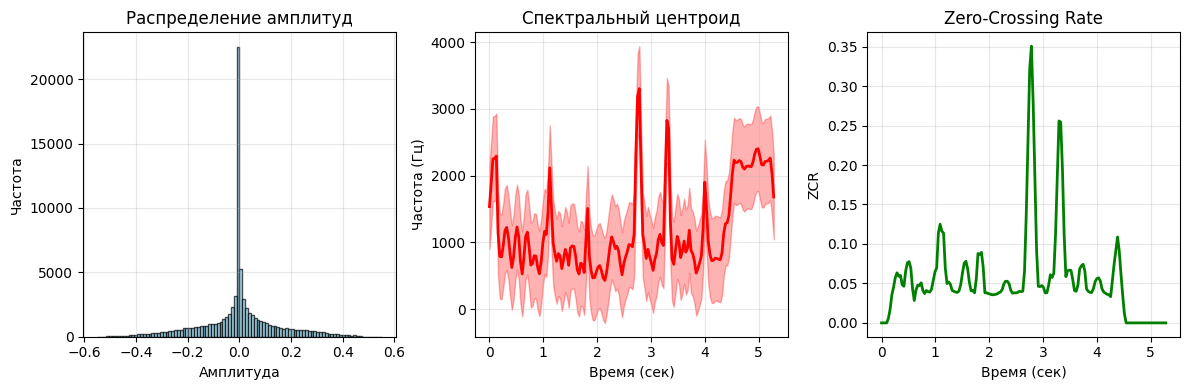


🔍 Анализ файла 3/4...

📊 АНАЛИЗ ФАЙЛА: audio_3_7_19992_B.wav
----------------------------------------
🔹 Длительность: 2.94 сек
🔹 Частота дискретизации: 16000 Гц
🔹 Количество сэмплов: 47,040
✅ Клиппинг: нет перегрузки


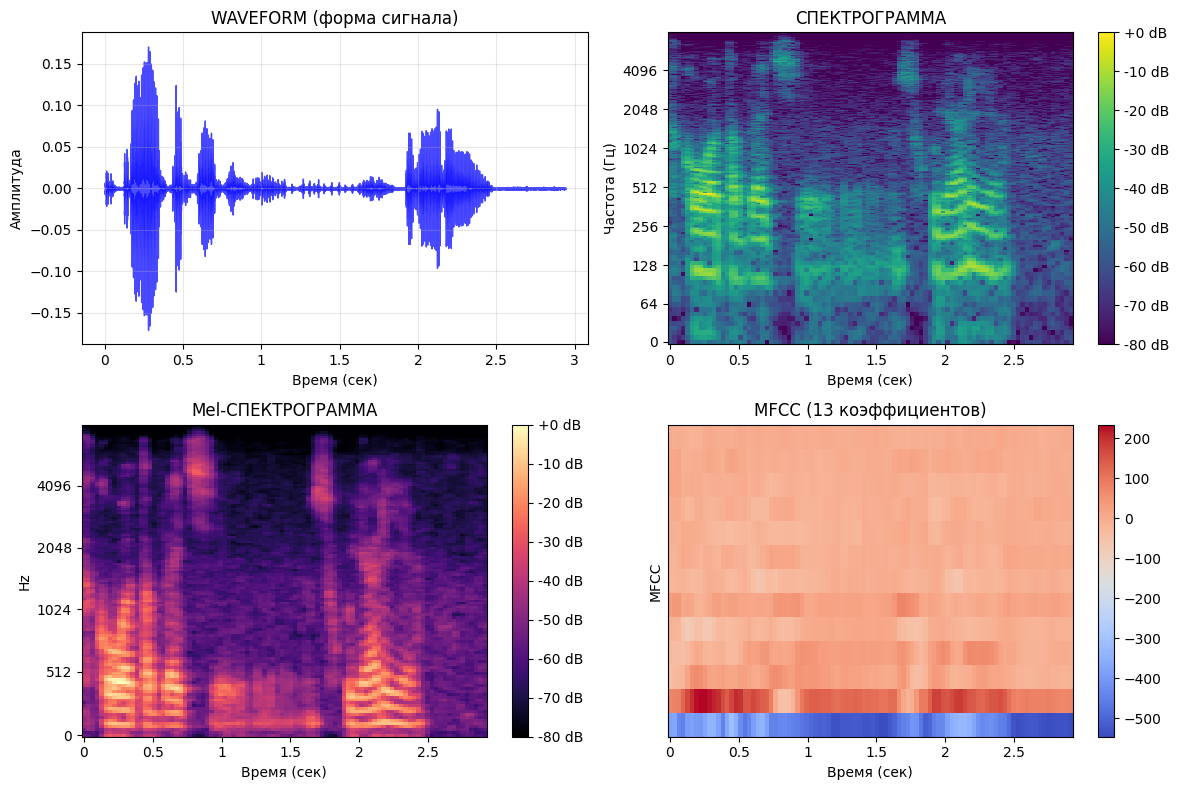


📏 АМПЛИТУДНЫЕ МЕТРИКИ:
  • RMS (среднеквадратичное): 0.0163
  • Пиковое значение: 0.1706
  • Крест-фактор: 10.48

📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
  • Спектральный центроид: 1453 Гц
  • Полоса пропускания: 1373 Гц

🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):
  • SNR: 15.6 dB
  • Качество: ⚠️  УДОВЛЕТВОРИТЕЛЬНОЕ

🎚️  MFCC (первые 5 коэффициентов):
  • MFCC_1: -455.99
  • MFCC_2: 116.95
  • MFCC_3: 12.56
  • MFCC_4: 15.22
  • MFCC_5: -15.73


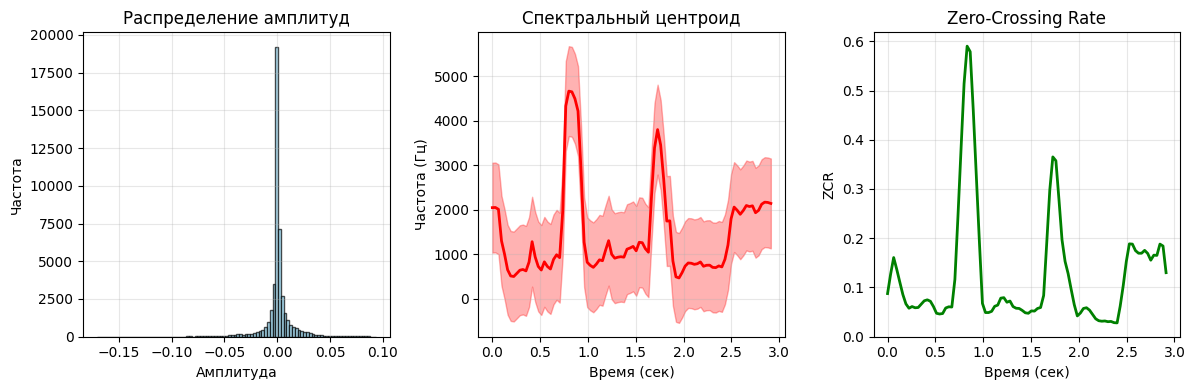


🔍 Анализ файла 4/4...

📊 АНАЛИЗ ФАЙЛА: audio_3_7_19996_B.wav
----------------------------------------
🔹 Длительность: 1.92 сек
🔹 Частота дискретизации: 16000 Гц
🔹 Количество сэмплов: 30,720
✅ Клиппинг: нет перегрузки


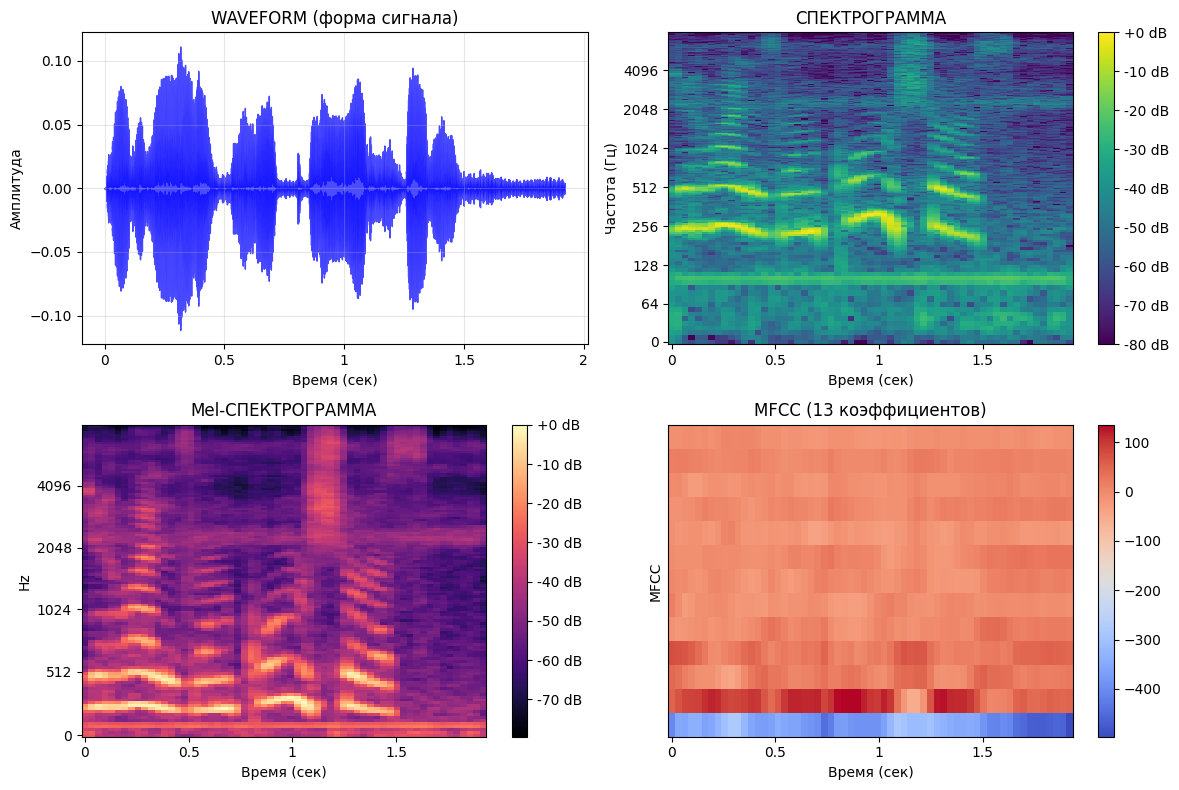


📏 АМПЛИТУДНЫЕ МЕТРИКИ:
  • RMS (среднеквадратичное): 0.0252
  • Пиковое значение: 0.1114
  • Крест-фактор: 4.42

📊 СПЕКТРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
  • Спектральный центроид: 1786 Гц
  • Полоса пропускания: 1790 Гц

🎯 СООТНОШЕНИЕ СИГНАЛ/ШУМ (SNR):
  • SNR: 1.5 dB
  • Качество: ❗ ПЛОХОЕ (много шума)

🎚️  MFCC (первые 5 коэффициентов):
  • MFCC_1: -373.31
  • MFCC_2: 76.12
  • MFCC_3: 16.34
  • MFCC_4: 31.23
  • MFCC_5: 4.63


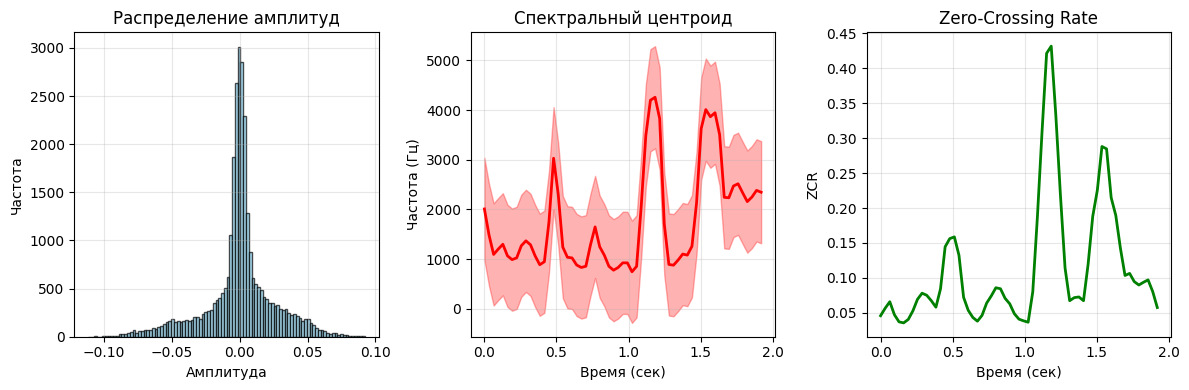


📋 СВОДНАЯ ТАБЛИЦА ПО ВСЕМ ФАЙЛАМ

📊 СРАВНЕНИЕ ФАЙЛОВ


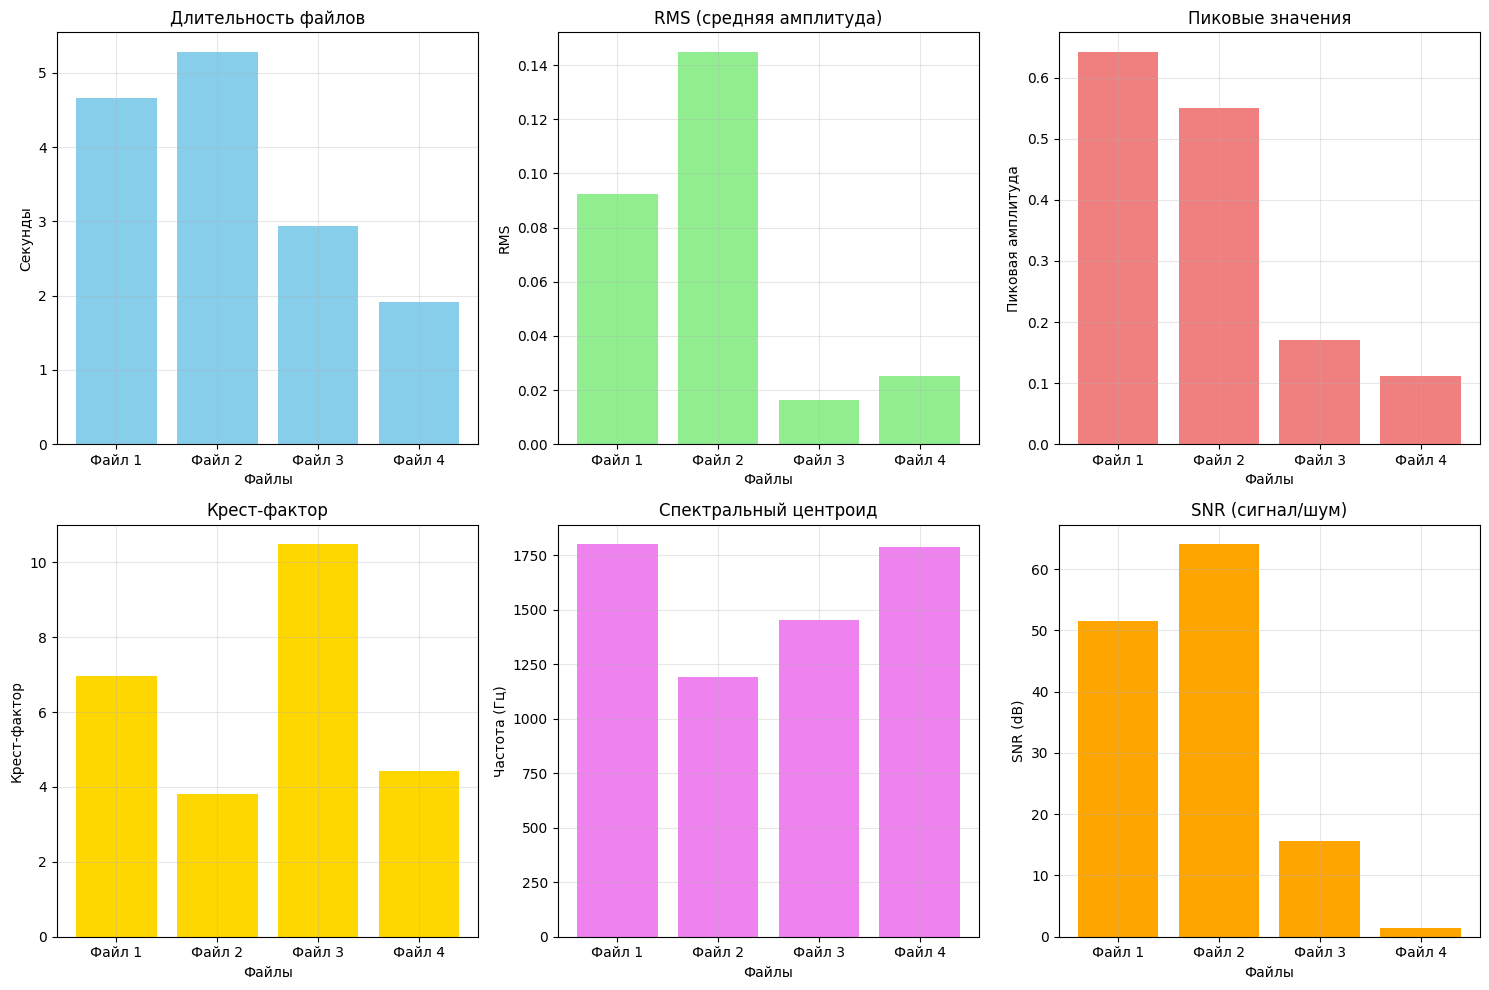


📄 КРАТКИЙ ОТЧЕТ

✅ ЛУЧШИЙ ФАЙЛ ПО КАЧЕСТВУ:
   • audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav
   • SNR: 64.0 dB

❌ ХУДШИЙ ФАЙЛ ПО КАЧЕСТВУ:
   • audio_3_7_19996_B.wav
   • SNR: 1.5 dB

🔊 САМЫЙ ГРОМКИЙ ФАЙЛ:
   • audiotts_ru_free_hf_vits_low_multispeaker_8_12_995_S.wav (RMS: 0.1448)

🔇 САМЫЙ ТИХИЙ ФАЙЛ:
   • audio_3_7_19992_B.wav (RMS: 0.0163)

💾 Результаты сохранены в 'audio_analysis_results.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ АНАЛИЗ ЗАВЕРШЕН!


In [10]:
# @title 3.2 Обработка нескольких файлов
silent = False # @param {"type":"boolean","placeholder":"отключить вывод"}

# ============================================
# 3. АНАЛИЗ ВСЕХ ФАЙЛОВ
# ============================================

def analyze_all_files():
    """Анализ всех загруженных файлов"""
    all_metrics = []

    print("\n" + "=" * 50)
    print("НАЧИНАЕМ АНАЛИЗ ВСЕХ ФАЙЛОВ")
    print("=" * 50)

    for i, audio_file in enumerate(audio_files, 1):
        print(f"\n🔍 Анализ файла {i}/{len(audio_files)}...")
        audio_file = audio_file
        # Для загруженных через files.upload()
        if isinstance(uploaded, dict) and audio_file in uploaded:
            # Сохраняем временный файл
            with open(audio_file, 'wb') as f:
                f.write(uploaded[audio_file])

        # Анализируем файл
        metrics = simple_audio_analysis(audio_file, output=not silent)
        if metrics:
            all_metrics.append(metrics)

    # ============================================
    # СВОДНАЯ ТАБЛИЦА ПО ВСЕМ ФАЙЛАМ
    # ============================================

    if all_metrics and not silent:
        print("\n" + "=" * 50)
        print("📋 СВОДНАЯ ТАБЛИЦА ПО ВСЕМ ФАЙЛАМ")
        print("=" * 50)

        df = pd.DataFrame(all_metrics)

        # Красивое отображение таблицы
        from IPython.display import display, HTML

        display(HTML(df.to_html(index=False, float_format=lambda x: f'{x:.2f}')))

        # ============================================
        # ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ ФАЙЛОВ
        # ============================================

        if len(all_metrics) > 1:
            num_files = len(df)
            base_width = 15
            dynamic_width = max(base_width, min(num_files * 0.2, 30))

            print("\n" + "=" * 50)
            print("📊 СРАВНЕНИЕ ФАЙЛОВ")
            print("=" * 50)

            fig, axes = plt.subplots(2, 3, figsize=(dynamic_width, 10))
            axes = axes.flatten()

            plot_details = [
                (df['duration'], 'skyblue', 'Длительность файлов', 'Секунды'),
                (df['rms'], 'lightgreen', 'RMS (средняя амплитуда)', 'RMS'),
                (df['peak'], 'lightcoral', 'Пиковые значения', 'Пиковая амплитуда'),
                (df['crest_factor'], 'gold', 'Крест-фактор', 'Крест-фактор'),
                (df['spectral_centroid'], 'violet', 'Спектральный центроид', 'Частота (Гц)')
            ]

            for i, (data, color, title, ylabel) in enumerate(plot_details):
                ax = axes[i]
                ax.bar(range(num_files), data, color=color)
                ax.set_title(title)
                ax.set_ylabel(ylabel)
                ax.grid(True, alpha=0.3)

                if num_files > 50:
                    ax.set_xticks([])
                    ax.set_xlabel('Файлы')
                elif num_files > 6:
                    ax.set_xticks(range(num_files))
                    ax.set_xticklabels([f'Файл {j+1}' for j in range(num_files)], rotation=45, ha='right')
                    ax.set_xlabel('Файлы')
                else:
                    ax.set_xticks(range(num_files))
                    ax.set_xticklabels([f'Файл {j+1}' for j in range(num_files)])
                    ax.set_xlabel('Файлы')

            ax = axes[5]
            if 'snr_db' in df.columns and not df['snr_db'].isna().all():
                ax.bar(range(num_files), df['snr_db'], color='orange' )
                ax.set_title('SNR (сигнал/шум)')
                ax.set_ylabel('SNR (dB)')
                ax.grid(True, alpha=0.3)

                if num_files > 50:
                    ax.set_xticks([])
                    ax.set_xlabel('Файлы')
                elif num_files > 6:
                    ax.set_xticks(range(num_files))
                    ax.set_xticklabels([f'Файл {j+1}' for j in range(num_files)], rotation=45, ha='right')
                    ax.set_xlabel('Файлы')
                else:
                    ax.set_xticks(range(num_files))
                    ax.set_xticklabels([f'Файл {j+1}' for j in range(num_files)])
                    ax.set_xlabel('Файлы')
            else:
                ax.text(0.5, 0.5, 'SNR данные\nнедоступны',
                              ha='center', va='center', fontsize=12)
                ax.set_title('SNR (сигнал/шум)')

            plt.tight_layout()
            plt.show()

            # ============================================
            # ПРОСТОЙ ОТЧЕТ
            # ============================================

            print("\n" + "=" * 50)
            print("📄 КРАТКИЙ ОТЧЕТ")
            print("=" * 50)

            # Находим лучший и худший файлы по SNR
            if 'snr_db' in df.columns and not df['snr_db'].isna().all():
                best_idx = df['snr_db'].idxmax()
                worst_idx = df['snr_db'].idxmin()

                print(f"\n✅ ЛУЧШИЙ ФАЙЛ ПО КАЧЕСТВУ:")
                print(f"   • {df.loc[best_idx, 'filename']}")
                print(f"   • SNR: {df.loc[best_idx, 'snr_db']:.1f} dB")

                print(f"\n❌ ХУДШИЙ ФАЙЛ ПО КАЧЕСТВУ:")
                print(f"   • {df.loc[worst_idx, 'filename']}")
                print(f"   • SNR: {df.loc[worst_idx, 'snr_db']:.1f} dB")

            # Проверяем на клиппинг
            clipping_files = df[df['clipping_percent'] > 0]
            if len(clipping_files) > 0:
                print(f"\n⚠️  ФАЙЛЫ С КЛИППИНГОМ (перегрузкой):")
                for _, row in clipping_files.iterrows():
                    print(f"   • {row['filename']}: {row['clipping_percent']:.2f}%")

            # Самый громкий и тихий файл
            loudest_idx = df['rms'].idxmax()
            quietest_idx = df['rms'].idxmin()

            print(f"\n🔊 САМЫЙ ГРОМКИЙ ФАЙЛ:")
            print(f"   • {df.loc[loudest_idx, 'filename']} (RMS: {df.loc[loudest_idx, 'rms']:.4f})")

            print(f"\n🔇 САМЫЙ ТИХИЙ ФАЙЛ:")
            print(f"   • {df.loc[quietest_idx, 'filename']} (RMS: {df.loc[quietest_idx, 'rms']:.4f})")

            # Сохранение результатов в CSV
            df.to_csv('audio_analysis_results.csv', index=False, encoding='utf-8-sig')
            print(f"\n💾 Результаты сохранены в 'audio_analysis_results.csv'")

            # Скачивание результатов
            from google.colab import files
            files.download('audio_analysis_results.csv')
    else:
        df = pd.DataFrame(all_metrics)
        # Сохранение результатов в CSV
        df.to_csv('audio_analysis_results.csv', index=False, encoding='utf-8-sig')
        print(f"\n💾 Результаты сохранены в 'audio_analysis_results.csv'")

        # Скачивание результатов
        from google.colab import files
        files.download('audio_analysis_results.csv')

    print("\n" + "=" * 50)
    print("✅ АНАЛИЗ ЗАВЕРШЕН!")
    print("=" * 50)

analyze_all_files()

<iframe src="https://drive.google.com/file/d/1b_whX3_o2ePTHiUSM2reeM3iHVgXngcj/preview" width="640" height="480"></iframe>